In [1]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
from sklearn.decomposition import PCA

In [4]:
df = df.drop("target", axis =1)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler().fit(df)

In [7]:
scald_data =scaler.transform(df)

In [10]:
scald_data

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [12]:
y = df['target']

In [14]:
pca = PCA(n_components = 1)

pca.fit(scald_data)
component =   pca.transform(scald_data)

In [15]:
component

array([[-0.52255527],
       [ 2.59038123],
       [ 3.04235225],
       ...,
       [ 1.24507295],
       [-1.62005279],
       [ 0.93416924]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test, y_train, y_test = train_test_split(component, y, test_size = 0.2, random_state = 42)

In [18]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

820 205 820 205


In [21]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(solver = 'lbfgs').fit(x_train, y_train)
result = logmodel.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, result)
print(score)

0.751219512195122


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, result)
print(cm)

[[70 32]
 [19 84]]


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
logmodel_roc_auc_score = roc_auc_score(y_test, logmodel.predict(x_test))

In [29]:
fpr, tpr, threshold = roc_curve(y_test, logmodel.predict_proba(x_test)[:, 1])

In [30]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00980392, 0.00980392, 0.00980392, 0.00980392, 0.00980392,
       0.00980392, 0.00980392, 0.01960784, 0.01960784, 0.01960784,
       0.01960784, 0.02941176, 0.02941176, 0.04901961, 0.04901961,
       0.04901961, 0.04901961, 0.07843137, 0.07843137, 0.07843137,
       0.07843137, 0.07843137, 0.07843137, 0.07843137, 0.09803922,
       0.09803922, 0.12745098, 0.12745098, 0.14705882, 0.14705882,
       0.14705882, 0.15686275, 0.15686275, 0.17647059, 0.17647059,
       0.17647059, 0.18627451, 0.20588235, 0.20588235, 0.2254902 ,
       0.2254902 , 0.2254902 , 0.2254902 , 0.24509804, 0.24509804,
       0.24509804, 0.26470588, 0.2745098 , 0.2745098 , 0.31372549,
       0.31372549, 0.33333333, 0.33333333, 0.34313725, 0.34313725,
       0.37254902, 0.37254902, 0.37254902, 0.39215686, 0.40196078,
       0.40196078, 0.42156863, 0.42156863, 0.43137255, 0.43137255,
       0.43137255, 0.44117647, 0.44117647, 0.5       , 0.51960

In [31]:
tpr

array([0.        , 0.00970874, 0.03883495, 0.05825243, 0.08737864,
       0.08737864, 0.10679612, 0.12621359, 0.13592233, 0.15533981,
       0.17475728, 0.2038835 , 0.2038835 , 0.22330097, 0.26213592,
       0.2815534 , 0.2815534 , 0.33009709, 0.33009709, 0.34951456,
       0.39805825, 0.41747573, 0.41747573, 0.42718447, 0.44660194,
       0.46601942, 0.50485437, 0.54368932, 0.5631068 , 0.5631068 ,
       0.58252427, 0.58252427, 0.59223301, 0.59223301, 0.62135922,
       0.63106796, 0.63106796, 0.6407767 , 0.6407767 , 0.66019417,
       0.67961165, 0.67961165, 0.67961165, 0.68932039, 0.68932039,
       0.7184466 , 0.73786408, 0.75728155, 0.75728155, 0.77669903,
       0.7961165 , 0.7961165 , 0.7961165 , 0.80582524, 0.80582524,
       0.82524272, 0.82524272, 0.84466019, 0.84466019, 0.85436893,
       0.85436893, 0.86407767, 0.88349515, 0.88349515, 0.88349515,
       0.89320388, 0.89320388, 0.91262136, 0.91262136, 0.94174757,
       0.96116505, 0.96116505, 0.97087379, 0.97087379, 0.97087

In [32]:
threshold

array([1.99101189e+00, 9.91011893e-01, 9.74869005e-01, 9.71838413e-01,
       9.59715326e-01, 9.56560552e-01, 9.53336881e-01, 9.51062900e-01,
       9.45379077e-01, 9.43932671e-01, 9.35130533e-01, 9.27570988e-01,
       9.26657281e-01, 9.20163164e-01, 9.17146313e-01, 9.16552124e-01,
       9.14085782e-01, 9.11659180e-01, 8.97754112e-01, 8.94329576e-01,
       8.69001160e-01, 8.68246628e-01, 8.62755239e-01, 8.59539742e-01,
       8.58923083e-01, 8.49683800e-01, 8.41002515e-01, 8.21881699e-01,
       8.19813398e-01, 8.02861484e-01, 7.93287733e-01, 7.79142436e-01,
       7.78572046e-01, 7.68209749e-01, 7.52514043e-01, 7.48423791e-01,
       7.48278182e-01, 7.47056906e-01, 7.46561462e-01, 7.07104418e-01,
       6.92150337e-01, 6.91196827e-01, 6.70421362e-01, 6.69656287e-01,
       6.61334991e-01, 6.46879622e-01, 6.44989389e-01, 6.29694001e-01,
       6.10691117e-01, 5.97709936e-01, 5.88484743e-01, 5.78210125e-01,
       5.40462863e-01, 5.34619261e-01, 5.11542510e-01, 4.94926271e-01,
      

In [33]:
import matplotlib.pyplot as plt

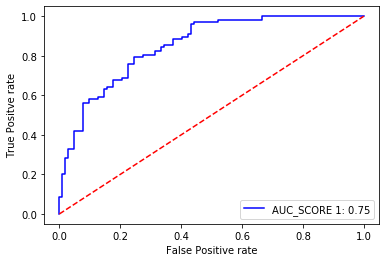

In [53]:
plt.plot(fpr, tpr, color = "blue", label = "AUC_SCORE 1: %.2f"%logmodel_roc_auc_score)
plt.plot([0,1], [0,1], color = "red", linestyle = "--")
plt.xlabel("False Positive rate")
plt.ylabel("True Positve rate")
plt.legend(loc = "lower right")
plt.Figure(figsize = (20,20))
plt.show()

In [54]:
y_pred_proba = logmodel.predict_proba(x_test)[:, 1]
y_pred_proba = y_pred_proba.reshape(1, -1)
y_pred_proba

array([[0.88445815, 0.92757099, 0.0749945 , 0.91256929, 0.27556694,
        0.23942488, 0.01110014, 0.01916269, 0.91226532, 0.01570699,
        0.91655212, 0.0078309 , 0.94537908, 0.8496838 , 0.07597188,
        0.77216524, 0.03575501, 0.97929703, 0.79328773, 0.06212403,
        0.75251404, 0.20534103, 0.51154251, 0.04686742, 0.75251404,
        0.91980978, 0.92016316, 0.8218817 , 0.01971226, 0.80286148,
        0.4563371 , 0.69215034, 0.61069112, 0.92757099, 0.94393267,
        0.82255467, 0.75251404, 0.4251614 , 0.36147059, 0.96116144,
        0.01916269, 0.12732039, 0.64498939, 0.51154251, 0.04672857,
        0.00483288, 0.3460941 , 0.76820975, 0.91408578, 0.23294682,
        0.84523253, 0.01982821, 0.77914244, 0.02865973, 0.92016316,
        0.36147059, 0.21294028, 0.02931161, 0.86275524, 0.87256019,
        0.66965629, 0.2583691 , 0.01971226, 0.23294682, 0.02089952,
        0.22143204, 0.99101189, 0.34936044, 0.00483288, 0.91165918,
        0.89775411, 0.01971226, 0.66133499, 0.91

In [55]:
from sklearn.preprocessing import binarize

In [57]:
y_pred_class = binarize(y_pred_proba, 0.35)[0]
y_pred_class = y_pred_class.astype(int)
y_pred_class

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1])

In [59]:
cm1 = confusion_matrix(y_test,y_pred_class)
print(cm1)

[[64 38]
 [12 91]]


In [60]:
score1 = accuracy_score(y_test, y_pred_class)
print(score1)

0.7560975609756098
